In [1]:
import tensorflow as tf

In [6]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train / 255

x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test / 255

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu', input_shape= (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
       
])

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               819712    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [12]:
class mycallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.97):
            print('accuracy target reached')
            self.model.stop_training = True

In [14]:
callbacks = mycallbacks()

model.fit(x_train, y_train, epochs = 10, callbacks=[callbacks])
test_loss =  model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4107 - accuracy: 0.8500
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2748 - accuracy: 0.8971
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2277 - accuracy: 0.9148
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1939 - accuracy: 0.9272
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1659 - accuracy: 0.9374
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1411 - accuracy: 0.9470
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1173 - accuracy: 0.9544
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0955 - accuracy: 0.9640
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0827 - accuracy: 0.9690
Epoch 10/10
313/313 [==============================] - 1s 5ms/st

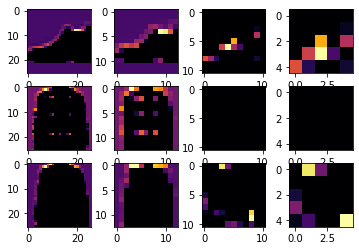

In [16]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)